In [26]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 400)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None

In [27]:
df_read = pd.read_excel("C:/Users/DELL/Desktop/superstore_churn/SuperstoreUniqueCustomer.xlsx")

In [28]:
df = df_read.copy()
df.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,
0,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating,NaN
1,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions,
2,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating,NaN
3,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention,NaN
4,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating,NaN


In [29]:
df.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,
0,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating,NaN
1,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions,
2,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating,NaN
3,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention,NaN
4,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating,NaN


In [30]:
today_date = dt.datetime(2018, 1, 1)
today_date

datetime.datetime(2018, 1, 1, 0, 0)

In [31]:
df["Recency_Monthly"] = df["Recency"]/30
df.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,,Recency_Monthly
0,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating,NaN,6.20
1,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions,,0.70
2,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating,NaN,8.70
3,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention,NaN,1.90
4,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating,NaN,13.90


In [32]:
df[["SEGMENT", "Recency", "Frequency", "Monetary"]].groupby("SEGMENT").agg(["mean", "count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
SEGMENT                                                         
About To Sleep        75.09    58      4.02    58  1460.66    58
At Risk              224.29   109      6.56   109  2401.65   109
Can Not Lose         212.87    39      9.97    39  3106.79    39
Champions             14.87    85      9.06    85  3180.00    85
Hibernating          378.74   170      3.71   170  1246.55   170
Loyal Customers       57.45   150      8.75   150  3077.93   150
Need Attention        80.07    30      6.40    30  2075.83    30
New Customers         14.56    18      3.11    18  1088.78    18
Potential Loyalists   27.91   116      5.61   116  1984.59   116
Promising             40.33    18      3.33    18  1037.39    18

In [33]:
df.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,,Recency_Monthly
0,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating,NaN,6.20
1,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions,,0.70
2,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating,NaN,8.70
3,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention,NaN,1.90
4,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating,NaN,13.90


In [12]:
# Müşterilerin churn olup olmamasına bak
# LT = 1/Churn
# LTV = LT * value (ciro/müşteri)
# CAC = LTV/5 müsteriyi kazanmak için harcayacağımız para (kampanyalar için)
#LTV / CAC = 5 in üstündeyse müşteriye yatırım yapıp yapmayacağımızı gösterir

In [46]:
LT = 1/churn
LT #müşteri kaç yıl bizde kalıyor

4.6647058823529415

In [ ]:
LTV = LT*value
LTV #genel

In [ ]:
ltv_customer = pd.DataFrame()
ltv_customer["master_id"] = df["master_id"]
ltv_customer["customer_value"] = df["customer_total_value"]/df["customer_total_order"]
ltv_customer["customer_LTV"] = ltv_customer["customer_value"]*LT
ltv_customer.head()

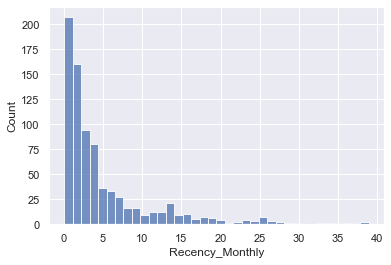

In [34]:
sns.set_theme(font_scale=1)
sns.histplot(x=df["Recency_Monthly"]); #churn ayını kaç alacağız? 7. ay alsak ne olur?

In [14]:
ms = df["CustomerID"].nunique() #müşteri sayısı
ms

793

In [44]:
cs = df[df["Recency_Monthly"]>4].shape[0] #churn sayısı
cs

273

In [45]:
churn = (cs/ms)
churn

0.3442622950819672

In [35]:
df["Churn"] = df["Recency_Monthly"]
df.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,,Recency_Monthly,Churn
0,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating,NaN,6.20,6.20
1,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions,,0.70,0.70
2,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating,NaN,8.70,8.70
3,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention,NaN,1.90,1.90
4,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating,NaN,13.90,13.90


In [38]:
df["Churn"] = df["Churn"].apply(lambda x :1 if x>7 else 0 )

In [39]:
df["Churn"].value_counts()

0    623
1    170
Name: Churn, dtype: int64

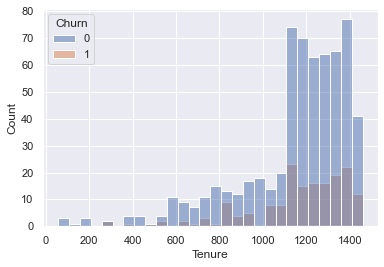

In [40]:
sns.histplot(data=df, x="Tenure", hue="Churn");

In [42]:
df.head(100)

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,,Recency_Monthly,Churn
0,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating,NaN,6.20,0
1,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions,,0.70,0
2,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating,NaN,8.70,1
3,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention,NaN,1.90,0
4,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating,NaN,13.90,1
5,AB-10060,18,56,836,28,8,3264,3,4,5,34,345,Loyal Customers,NaN,1.87,0
6,AB-10105,20,43,1108,37,10,5381,4,5,5,45,455,Loyal Customers,NaN,1.43,0
7,AB-10150,12,43,1398,46,5,961,4,2,2,42,422,Potential Loyalists,NaN,1.43,0
8,AB-10165,14,27,1142,38,8,1089,5,4,2,54,542,Champions,NaN,0.90,0
9,AB-10255,14,168,1259,42,9,904,2,5,1,25,251,Can Not Lose,NaN,5.60,0


In [43]:
df.to_excel('superstore_churn.xlsx', index=False)